In [4]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
import glob as glob
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.stats import wishart
import hypertools as hyp
from scipy.spatial.distance import cdist
%matplotlib inline


In [5]:
LEGEND_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [6]:
#results_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results', 'higher_order_sims')
results_dir = os.path.join('../../data/', 'results', 'higher_order_sims')

In [7]:
figdir = '../figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [8]:
conds = ['constant', 'random', 'ramping', 'block']

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


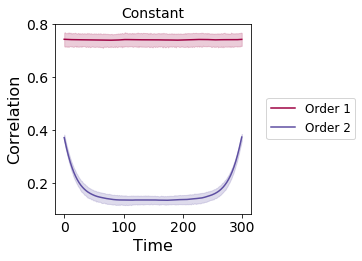

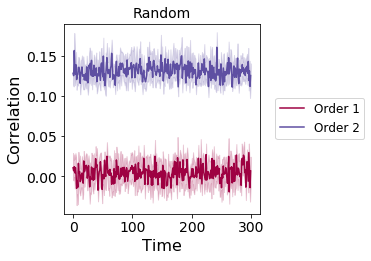

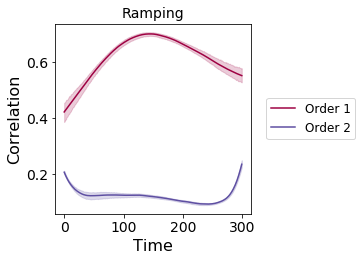

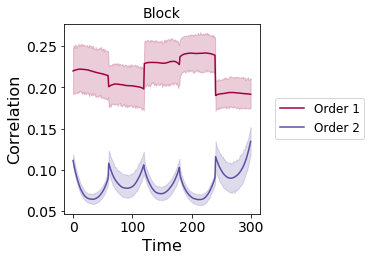

In [45]:
for cond in conds:
    result_cond = os.path.join(results_dir, cond)

    recovery_performance_all = pd.DataFrame()
    for e, r in enumerate(glob.glob(os.path.join(result_cond, '*'))):

        recovery_performance_all = recovery_performance_all.append(pd.read_csv(r))
        recovery_performance_all['iteration'] = int(e)


    melted = pd.melt(recovery_performance_all, id_vars=['time'], value_vars=['1', '2'])
    melted = melted.astype({"variable": int})
    plt.figure(figsize=(3.5,3.5))
    ax = sns.lineplot(x="time", y="value", hue='variable', palette = 'Spectral', data=melted)
    ax.set(xlabel='Time', ylabel='Correlation', title=cond.capitalize())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, handles=handles[2:], labels=['Order 1', 'Order 2'])

    plt.gcf().savefig(os.path.join(figdir, 'high_order_sim_' + cond + '.pdf'), bbox_inches='tight')


In [9]:
results_dir = os.path.join('../../data/', 'results', 'higher_order_sims_search')

In [155]:
cond = 'block'

In [20]:
result_cond = os.path.join(results_dir, cond + '_*')

In [43]:
r.split('/')[-1].split('.')[0]

['9', 'csv']

In [28]:
split_string = r.split('/')[-2].split('_')

In [31]:
split_string

['block', '50', '5', '50']

block
1
block
2


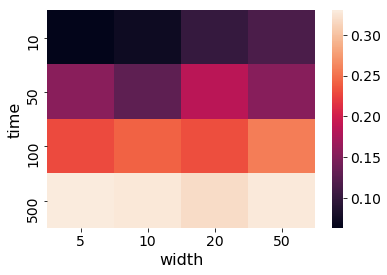

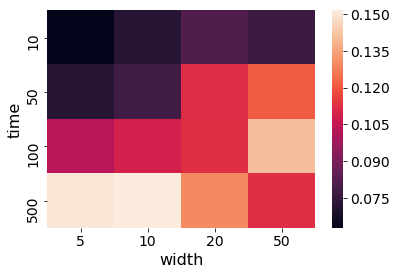

In [156]:

result_cond = os.path.join(results_dir, cond + '_*')

recovery_performance_all = pd.DataFrame()
for e, r in enumerate(glob.glob(os.path.join(result_cond, '*'))):
    recovery_performance_part = pd.read_csv(r)
    split_it = r.split('/')[-1].split('.')[0]
    split_string = r.split('/')[-2].split('_')
    recovery_performance_part['iteration'] = int(split_it)
    recovery_performance_part['time'] = int(split_string[1])
    recovery_performance_part['features'] = int(split_string[2])
    recovery_performance_part['width'] = int(split_string[3])
    recovery_performance_all = recovery_performance_all.append(recovery_performance_part)

melted = pd.melt(recovery_performance_all, id_vars=['time', 'width'], value_vars=['1', '2'])
melted = melted.astype({"variable": int})

for order in [1, 2]:
    plt.figure()
    df = melted[melted['variable']==order]
    heatmap_data = pd.pivot_table(df, values='value', index=['time'], columns='width')
    print(cond)
    print(order)
    sns.heatmap(heatmap_data)
    plt.plot()




In [118]:
recovery_performance_all

,time,1,2,iteration,features,width
0,100,0.219225,0.089998,0,10,20
1,100,0.228756,0.091585,0,10,20
2,100,0.238495,0.093476,0,10,20
3,100,0.248348,0.095508,0,10,20
4,100,0.258404,0.097727,0,10,20
5,100,0.268529,0.099997,0,10,20
6,100,0.278969,0.102349,0,10,20
7,100,0.289912,0.104908,0,10,20
8,100,0.301010,0.107596,0,10,20
9,100,0.312206,0.110248,0,10,20


In [119]:
melted = pd.melt(recovery_performance_all, id_vars=['time', 'width'], value_vars=['1', '2'])
melted = melted.astype({"variable": int})


In [121]:
melted

,time,width,variable,value
0,100,20,1,0.219225
1,100,20,1,0.228756
2,100,20,1,0.238495
3,100,20,1,0.248348
4,100,20,1,0.258404
5,100,20,1,0.268529
6,100,20,1,0.278969
7,100,20,1,0.289912
8,100,20,1,0.301010
9,100,20,1,0.312206


In [127]:
order_1 = melted[melted['variable']==1]

In [136]:
heatmap_data = pd.pivot_table(order_1, values='value', index=['time'], columns='width')

In [137]:
heatmap_data

width,5,10,20,50
time,,,,
10,0.167717,0.167709,0.185817,0.213777
50,0.435867,0.434297,0.440216,0.497480
100,0.509827,0.561880,0.503551,0.612854
500,0.659964,0.641977,0.697750,0.691991


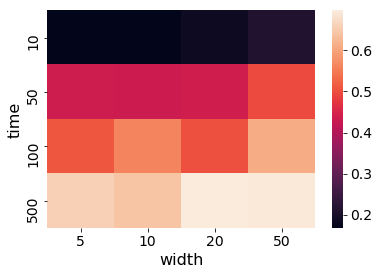

In [138]:
sns.heatmap(heatmap_data)

In [ ]:
pivoted = df.pivot('salesman', 'product', 'price')

In [129]:
order_1.pivot('time', 'width')

ValueError: Index contains duplicate entries, cannot reshape

In [90]:
order_1

time,10,50,100,500
1,,,,
-0.734459,NaN,10.0,NaN,NaN
-0.709130,NaN,10.0,NaN,NaN
-0.691769,50.0,NaN,NaN,NaN
-0.684825,20.0,NaN,NaN,NaN
-0.679898,50.0,NaN,NaN,NaN
-0.673994,NaN,NaN,NaN,5.0
-0.672073,NaN,NaN,NaN,5.0
-0.670072,NaN,NaN,20.0,NaN
-0.666644,NaN,NaN,NaN,50.0


In [131]:
order_1.pivot(index='time', columns='width', values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [93]:
melted = pd.melt(recovery_performance_all, id_vars=['time', 'width'], value_vars=['1', '2'])
melted = melted.astype({"variable": int})

In [94]:
melted

,time,width,variable,value
0,100,20,1,0.219225
1,100,20,1,0.228756
2,100,20,1,0.238495
3,100,20,1,0.248348
4,100,20,1,0.258404
5,100,20,1,0.268529
6,100,20,1,0.278969
7,100,20,1,0.289912
8,100,20,1,0.301010
9,100,20,1,0.312206


In [ ]:
df_m = df.groupby(["SymmetricDivision", "MutProb"])
          .size()
          .unstack(level=0)

In [101]:
order_1

,time,width,variable,value
0,100,20,1,0.219225
1,100,20,1,0.228756
2,100,20,1,0.238495
3,100,20,1,0.248348
4,100,20,1,0.258404
5,100,20,1,0.268529
6,100,20,1,0.278969
7,100,20,1,0.289912
8,100,20,1,0.301010
9,100,20,1,0.312206


In [116]:
result = order_1.reset_index().pivot(index='time', columns='width', values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [133]:
g = order_1.groupby(["time", "width"])

In [113]:
order_1 = melted[melted['variable']==1]

g = order_1.groupby(["time", "width", 'value'])



In [114]:
g

In [134]:
g.corr()

variable  value
time width                          
10   5     variable       NaN    NaN
           value          NaN    1.0
     10    variable       NaN    NaN
           value          NaN    1.0
     20    variable       NaN    NaN
           value          NaN    1.0
     50    variable       NaN    NaN
           value          NaN    1.0
50   5     variable       NaN    NaN
           value          NaN    1.0
     10    variable       NaN    NaN
           value          NaN    1.0
     20    variable       NaN    NaN
           value          NaN    1.0
     50    variable       NaN    NaN
           value          NaN    1.0
100  5     variable       NaN    NaN
           value          NaN    1.0
     10    variable       NaN    NaN
           value          NaN    1.0
     20    variable       NaN    NaN
           value          NaN    1.0
     50    variable       NaN    NaN
           value          NaN    1.0
500  5     variable       NaN    NaN
           value          NaN    1.0
     10    variable       NaN    NaN
           value          NaN    1.0
     20    variable       NaN    NaN
           value          NaN    1.0
     50    variable       NaN    NaN
           value          NaN    1.0

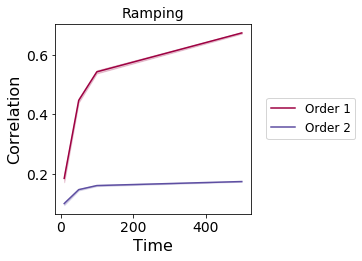

In [63]:
    
melted = pd.melt(recovery_performance_all, id_vars=['time', 'width'], value_vars=['1', '2'])
melted = melted.astype({"variable": int})
plt.figure(figsize=(3.5,3.5))

ax = sns.lineplot(x="time", y="value", hue='variable', palette = 'Spectral', data=melted)
ax.set(xlabel='Time', ylabel='Correlation', title=cond.capitalize())
handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, handles=handles[2:], labels=['Order 1', 'Order 2'])



In [17]:
# results_dir = os.path.join(config['resultsdir'], 'higher_order_sims_search',
#                            sim_function + '_' + str(T)+ '_' + str(F)+ '_' + str(W))

In [19]:
glob.glob(os.path.join(result_cond, '*'))[0].

'../../data/results/higher_order_sims_search/ramping_100_10_20/0.csv'

In [3]:
glob.glob(os.path.join(result_cond, '*'))

NameError: name 'glob' is not defined

In [ ]:
for cond in conds:
    result_cond = os.path.join(results_dir, cond)

    recovery_performance_all = pd.DataFrame()
    for e, r in enumerate(glob.glob(os.path.join(result_cond, '*'))):

        recovery_performance_all = recovery_performance_all.append(pd.read_csv(r))
        recovery_performance_all['iteration'] = int(e)


    melted = pd.melt(recovery_performance_all, id_vars=['time'], value_vars=['1', '2'])
    melted = melted.astype({"variable": int})
    plt.figure(figsize=(3.5,3.5))
    ax = sns.lineplot(x="time", y="value", hue='variable', palette = 'Spectral', data=melted)
    ax.set(xlabel='Time', ylabel='Correlation', title=cond.capitalize())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, handles=handles[2:], labels=['Order 1', 'Order 2'])

